# Patch bicubico interpolante alla Hermite

Definiamo una figura per ricavare la matrice dei corner e delle derivate. Prendiamo come esempio un toroide

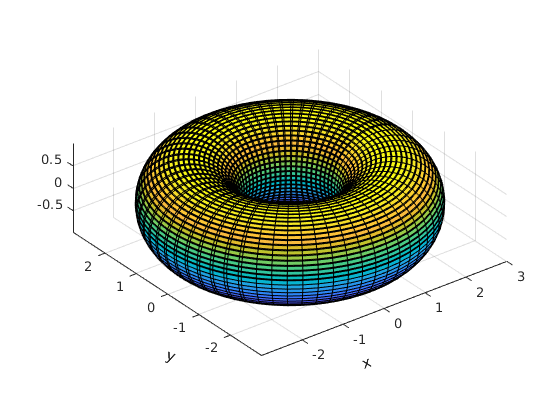

In [42]:
s_a = 0; s_b = 10;
s = linspace(s_a, s_b, 100);
t_a = 0; t_b = 10;
t = linspace(t_a, t_b, 100);
[ss, tt] = meshgrid(s, t);
x = (2 + cos(tt)).*cos(ss);
y = (2 + cos(tt)).*sin(ss);
z = sin(tt);
surf(x, y, z);axis equal; xlabel('x', 'Rotation',20); ylabel('y', 'Rotation',-20)

Prendiamo solo una porzione di questo delimitata dai parametri $s_a$, $s_b$, $t_a$ e $t_b$

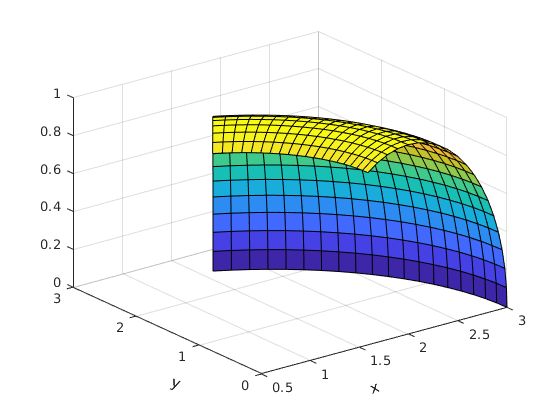

In [43]:
s_a = 0; s_b = 1;
s = linspace(s_a, s_b, 20);
t_a = 0; t_b = 2;
t = linspace(t_a, t_b, 20);
[ss, tt] = meshgrid(s, t);
x = (2 + cos(tt)).*cos(ss);
y = (2 + cos(tt)).*sin(ss);
z = sin(tt);
surf(x, y, z); xlabel('x', 'Rotation',20); ylabel('y', 'Rotation',-20)

## Punti per l'interpolazione

Ricaviamo valori ($x$ $y$ $z$) dei corner su questa superficie

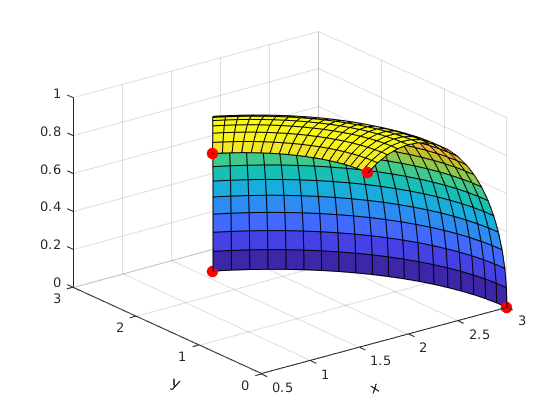

In [44]:
cx_1 = (2 + cos(t_a)).*cos(s_a);
cy_1 = (2 + cos(t_a)).*sin(s_a);
cz_1 = sin(t_a);

cx_2 = (2 + cos(t_b)).*cos(s_a);
cy_2 = (2 + cos(t_b)).*sin(s_a);
cz_2 = sin(t_b);

cx_3 = (2 + cos(t_b)).*cos(s_b);
cy_3 = (2 + cos(t_b)).*sin(s_b);
cz_3 = sin(t_b);

cx_4 = (2 + cos(t_a)).*cos(s_b);
cy_4 = (2 + cos(t_a)).*sin(s_b);
cz_4 = sin(t_a);

surf(x, y, z); xlabel('x', 'Rotation',20); ylabel('y', 'Rotation',-20); hold on;
plot3(cx_1, cy_1, cz_1, 'r.', 'MarkerSize', 30);
plot3(cx_2, cy_2, cz_2, 'r.', 'MarkerSize', 30);
plot3(cx_3, cy_3, cz_3, 'r.', 'MarkerSize', 30);
plot3(cx_4, cy_4, cz_4, 'r.', 'MarkerSize', 30);

# Costruzione della matrice C

Il patch può essere scritto usando la base di Hermite con tale formula:

$\mathbf{X}(s,t) = \mathbf{H}^T(s)\mathbf{CH}(t)$

dove 

$H^3_0(t) = 1 - 3t^2 + 2t^3, H^3_1(t) = t -2t^2 + t^3, H^3_2(t) = t^3 - t^2, H^3_3(t) = 3t^2 - 2t^3$

e dove 

$\mathbf{H}(t) = (H^3_0(t), H^3_1(t), H^3_2(t), H^3_3(t))$.

La matrice $\mathbf{C}$ è data dai corner della superficie e dalle derivate sui parametri $(s, t) \in [0, 1]^2$:

$ \mathbf{C} = 
\begin{pmatrix}
\mathbf{X}(0,0) & \mathbf{X}_t(0,0) & \mathbf{X}_t(0,1) & \mathbf{X}(0,1) \\
\mathbf{X}_s(0,0) & \mathbf{X}_{st}(0,0) & \mathbf{X}_{st}(0,1) & \mathbf{X}_s(0,1) \\
\mathbf{X}_s(1,0) & \mathbf{X}_{st}(1,0) & \mathbf{X}_{st}(1,1) & \mathbf{X}_s(1,1) \\
\mathbf{X}(1,0) & \mathbf{X}_t(1,0) & \mathbf{X}_t(1,1) & \mathbf{X}(1,1) 
\end{pmatrix}  $

Questa matrice è costituita da tre piani.

Definiamo le derivate per le funzioni su $(x, y, z)$:

In [45]:
syms s t f_x(s,t) f_y(s,t) f_z(s,t)

f_x(s,t) = (2 + cos(t)).*cos(s);
f_y(s,t) = (2 + cos(t)).*sin(s);
f_z(s,t) = sin(t);

df_xt = diff(f_x, t);
df_xs = diff(f_x, s);
df_xst = diff(f_x, s, t);

df_yt = diff(f_y, t);
df_ys = diff(f_y, s);
df_yst = diff(f_y, s, t);

df_zt = diff(f_z, t);
df_zs = diff(f_z, s);
df_zst = diff(f_z, s, t);

## Matrice C piano X

La costruzione per ogni piano è uguale. Qui vediamo in dettaglio la matrice per il piano $X$

In [46]:
C_x = zeros(4,4);
C_x(1,1) = f_x(s_a, t_a);
C_x(1,2) = df_xt(s_a, t_a);
C_x(2,1) = df_xs(s_a, t_a);
C_x(2,2) = df_xst(s_a, t_a);

C_x(1,4) = f_x(s_a, t_b);
C_x(1,3) = df_xt(s_a, t_b);
C_x(2,4) = df_xs(s_a, t_b);
C_x(2,3) = df_xst(s_a, t_b);

C_x(4,1) = f_x(s_b, t_a);
C_x(4,2) = df_xt(s_b, t_a);
C_x(3,1) = df_xs(s_b, t_a);
C_x(3,2) = df_xst(s_b, t_a);

C_x(4,4) = f_x(s_b, t_b);
C_x(4,3) = df_xt(s_b, t_b);
C_x(3,4) = df_xs(s_b, t_b);
C_x(3,3) = df_xst(s_b, t_b)


C_x =

    3.0000         0   -0.9093    1.5839
         0         0         0         0
   -2.5244         0    0.7651   -1.3328
    1.6209         0   -0.4913    0.8558



## Matrice C piano Y

In [47]:
C_y = zeros(4,4);C_y(1,1) = f_y(s_a, t_a);C_y(1,2) = df_yt(s_a, t_a);C_y(2,1) = df_ys(s_a, t_a);C_y(2,2) = df_yst(s_a, t_a);C_y(1,4) = f_y(s_a, t_b);C_y(1,3) = df_yt(s_a, t_b);C_y(2,4) = df_ys(s_a, t_b);C_y(2,3) = df_yst(s_a, t_b);C_y(4,1) = f_y(s_b, t_a);C_y(4,2) = df_yt(s_b, t_a);C_y(3,1) = df_ys(s_b, t_a);C_y(3,2) = df_yst(s_b, t_a);C_y(4,4) = f_y(s_b, t_b);C_y(4,3) = df_yt(s_b, t_b);C_y(3,4) = df_ys(s_b, t_b);C_y(3,3) = df_yst(s_b, t_b)


C_y =

         0         0         0         0
    3.0000         0   -0.9093    1.5839
    1.6209         0   -0.4913    0.8558
    2.5244         0   -0.7651    1.3328



## Matrice C piano Z

In [48]:
C_z = zeros(4,4);C_z(1,1) = f_z(s_a, t_a);C_z(1,2) = df_zt(s_a, t_a);C_z(2,1) = df_zs(s_a, t_a);C_z(2,2) = df_zst(s_a, t_a);C_z(1,4) = f_z(s_a, t_b);C_z(1,3) = df_zt(s_a, t_b);C_z(2,4) = df_zs(s_a, t_b);C_z(2,3) = df_zst(s_a, t_b);C_z(4,1) = f_z(s_b, t_a);C_z(4,2) = df_zt(s_b, t_a);C_z(3,1) = df_zs(s_b, t_a);C_z(3,2) = df_zst(s_b, t_a);C_z(4,4) = f_z(s_b, t_b);C_z(4,3) = df_zt(s_b, t_b);C_z(3,4) = df_zs(s_b, t_b);C_z(3,3) = df_zst(s_b, t_b)


C_z =

         0    1.0000   -0.4161    0.9093
         0         0         0         0
         0         0         0         0
         0    1.0000   -0.4161    0.9093



# Patch bicubico in forma di Hermite

Definiamo le funzione della base di Hermite e scriviamo $\mathbf{X}(s,t) = \mathbf{H}^T(s)\mathbf{CH}(t)$ per i tre piani.

Una volta definito il patch lo utiliziamo per la visualizzazione.

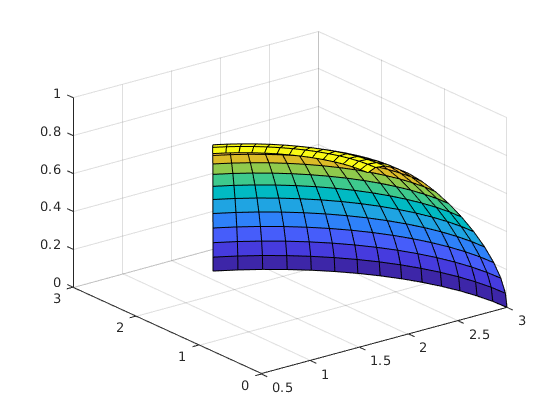

In [49]:
syms H_0_t(t) H_1_t(t) H_2_t(t) H_3_t(t) H_0_s(s) H_1_s(s) H_2_s(s) H_3_s(s)

H_0_t(t) = 1 - 3*t.^2 + 2.*t.^3;
H_1_t(t) = t - 2*t.^2 + t.^3;
H_2_t(t) = t.^3 - t.^2;
H_3_t(t) = 3*t.^2 - 2*t.^3;

H_0_s(s) = 1 - 3*s.^2 + 2*s.^3;
H_1_s(s) = s - 2*s.^2 + s.^3;
H_2_s(s) = s.^3 - s.^2;
H_3_s(s) = 3*s.^2 - 2*s.^3;

H_t = [H_0_t(t); H_1_t(t); H_2_t(t); H_3_t(t)];
H_s = [H_0_s(s); H_1_s(s); H_2_s(s); H_3_s(s)];

X_st = symfun((H_s.') * C_x * H_t, [s,t]);
Y_st = symfun((H_s.') * C_y * H_t, [s,t]);
Z_st = symfun((H_s.') * C_z * H_t, [s,t]);

prec = 15;
X = zeros(prec, prec);
Y = zeros(prec, prec);
Z = zeros(prec, prec);

u = linspace(0, 1, prec);
v = linspace(0, 1, prec);

for i = 1:prec
    for j = 1:prec
        X(i,j) = X_st(u(i), v(j));
        Y(i,j) = Y_st(u(i), v(j));
        Z(i,j) = Z_st(u(i), v(j));
    end
end

surf(X,Y,Z);

## Conversione in forma di Bezier

Possiamo trasformare il patch dalla forma di Hermite alla forma di Bezier usando semplici calcoli.

Il patch in forma di Bezier è così definito:

$\mathbf{X}(s,t) = \mathbf{B}^T(s)\mathbf{M B}(t)$

dove 

$B^3_0(t) = (1 - t)^3, B^3_1(t) = 3*t*(1 - t)^2, B^3_2(t) = 3*t^2*(1 - t), B^3_3(t) = t^3$

e dove 

$\mathbf{B}(t) = (B^3_0(t), B^3_1(t), B^3_2(t), B^3_3(t))$.

In [50]:
M_x = zeros(4, 4);

%  Corner
M_x(1, 1) = C_x(1, 1);
M_x(1, 4) = C_x(1, 4);
M_x(4, 1) = C_x(4, 1);
M_x(4, 4) = C_x(4, 4);

M_x(1, 2) = C_x(1, 1) + C_x(1, 2)/3;
M_x(2, 1) = C_x(1, 1) + C_x(2, 1)/3;
M_x(2, 2) = C_x(1, 1) + C_x(1, 2)/3 + C_x(2, 1)/3 + C_x(2, 2)/9;

M_x(3, 1) = C_x(4, 1) - C_x(3, 1)/3;
M_x(4, 2) = C_x(4, 1) + C_x(4, 2)/3;
M_x(3, 2) = C_x(4, 1) + C_x(4, 2)/3 - C_x(3, 1)/3 + C_x(3, 2)/9;

M_x(2, 4) = C_x(1, 4) + C_x(2, 4)/3;
M_x(1, 3) = C_x(1, 4) - C_x(1, 3)/3;
M_x(2, 3) = C_x(1, 4) + C_x(2, 4)/3 - C_x(1, 3)/3 - C_x(2, 3)/9;

M_x(3, 4) = C_x(4, 4) - C_x(3, 4)/3;
M_x(4, 3) = C_x(4, 4) - C_x(4, 3)/3;
M_x(3, 3) = C_x(4, 4) - C_x(4, 3)/3 - C_x(3, 4)/3 + C_x(3, 3)/9


M_x =

    3.0000    3.0000    1.8870    1.5839
    3.0000    3.0000    1.8870    1.5839
    2.4624    2.4624    1.5488    1.3000
    1.6209    1.6209    1.0195    0.8558



## Punti di controllo Y

In [51]:
M_y = zeros(4, 4);
M_y(1, 1) = C_y(1, 1);M_y(1, 4) = C_y(1, 4);M_y(4, 1) = C_y(4, 1);M_y(4, 4) = C_y(4, 4);M_y(1, 2) = C_y(1, 1) + C_y(1, 2)/3;M_y(2, 1) = C_y(1, 1) + C_y(2, 1)/3;M_y(2, 2) = C_y(1, 1) + C_y(1, 2)/3 + C_y(2, 1)/3 + C_y(2, 2)/9;M_y(3, 1) = C_y(4, 1) - C_y(3, 1)/3;M_y(4, 2) = C_y(4, 1) + C_y(4, 2)/3;M_y(3, 2) = C_y(4, 1) + C_y(4, 2)/3 - C_y(3, 1)/3 + C_y(3, 2)/9;M_y(2, 4) = C_y(1, 4) + C_y(2, 4)/3;M_y(1, 3) = C_y(1, 4) - C_y(1, 3)/3;M_y(2, 3) = C_y(1, 4) + C_y(2, 4)/3 - C_y(1, 3)/3 - C_y(2, 3)/9;M_y(3, 4) = C_y(4, 4) - C_y(3, 4)/3;M_y(4, 3) = C_y(4, 4) - C_y(4, 3)/3;M_y(3, 3) = C_y(4, 4) - C_y(4, 3)/3 - C_y(3, 4)/3 + C_y(3, 3)/9


M_y =

         0         0         0         0
    1.0000    1.0000    0.6290    0.5280
    1.9841    1.9841    1.2480    1.0475
    2.5244    2.5244    1.5878    1.3328



## Punti di controllo Z

In [52]:
M_z = zeros(4, 4); 
M_z(1, 1) = C_z(1, 1);M_z(1, 4) = C_z(1, 4);M_z(4, 1) = C_z(4, 1);M_z(4, 4) = C_z(4, 4);M_z(1, 2) = C_z(1, 1) + C_z(1, 2)/3;M_z(2, 1) = C_z(1, 1) + C_z(2, 1)/3;M_z(2, 2) = C_z(1, 1) + C_z(1, 2)/3 + C_z(2, 1)/3 + C_z(2, 2)/9;M_z(3, 1) = C_z(4, 1) - C_z(3, 1)/3;M_z(4, 2) = C_z(4, 1) + C_z(4, 2)/3;M_z(3, 2) = C_z(4, 1) + C_z(4, 2)/3 - C_z(3, 1)/3 + C_z(3, 2)/9;M_z(2, 4) = C_z(1, 4) + C_z(2, 4)/3;M_z(1, 3) = C_z(1, 4) - C_z(1, 3)/3;M_z(2, 3) = C_z(1, 4) + C_z(2, 4)/3 - C_z(1, 3)/3 - C_z(2, 3)/9;M_z(3, 4) = C_z(4, 4) - C_z(3, 4)/3;M_z(4, 3) = C_z(4, 4) - C_z(4, 3)/3;M_z(3, 3) = C_z(4, 4) - C_z(4, 3)/3 - C_z(3, 4)/3 + C_z(3, 3)/9


M_z =

         0    0.3333    1.0480    0.9093
         0    0.3333    1.0480    0.9093
         0    0.3333    1.0480    0.9093
         0    0.3333    1.0480    0.9093



## Costruzione della forma di Bezier

Definiamo le funzioni di base e il patch.

In [39]:
syms  Ber_0_t(t) Ber_1_t(t) Ber_2_t(t) Ber_3_t(t) Ber_0_s(s) Ber_1_s(s) Ber_2_s(s) Ber_3_s(s)
Ber_0_t(t) = (1 - t).^3;
Ber_1_t(t) = 3*t*(1 - t).^2;
Ber_2_t(t) = 3*t.^2*(1 - t);
Ber_3_t(t) = t.^3;

Ber_0_s(s) = (1 - s).^3;
Ber_1_s(s) = 3*s*(1 - s).^2;
Ber_2_s(s) = 3*s.^2*(1 - s);
Ber_3_s(s) = s.^3;

Ber_t = [Ber_0_t(t); Ber_1_t(t); Ber_2_t(t); Ber_3_t(t)];
Ber_s = [Ber_0_s(s); Ber_1_s(s); Ber_2_s(s); Ber_3_s(s)];

XB_st = symfun((Ber_s.') * M_x * Ber_t, [s,t]);
YB_st = symfun((Ber_s.') * M_y * Ber_t, [s,t]);
ZB_st = symfun((Ber_s.') * M_z * Ber_t, [s,t]);

## Controllo di equivalenza 

Controlliamo che il patch in forma di Bezier sia uguale a quello in forma di Hermite

In [64]:
assume(s_a <= s <= s_b)
assume(t_a <= t <= t_b)
isAlways(abs(X_st - XB_st) <  1.0e-10 )
isAlways(abs(Y_st - YB_st) <  1.0e-10 )
isAlways(abs(Z_st - ZB_st) <  1.0e-10 )


ans =

  logical

   1


ans =

  logical

   1


ans =

  logical

   1



Disegnamo infine il patch in forma di Bezier.

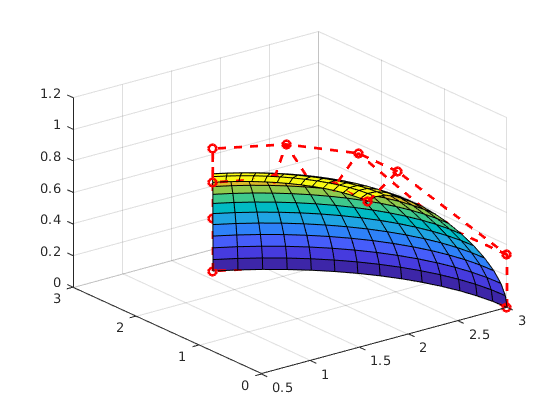

In [61]:
prec = 15;
X = zeros(prec, prec);
Y = zeros(prec, prec);
Z = zeros(prec, prec);

u = linspace(0, 1, prec);
v = linspace(0, 1, prec);
for i = 1:prec
    for j = 1:prec
        X(i,j) = XB_st(u(i), v(j));
        Y(i,j) = YB_st(u(i), v(j));
        Z(i,j) = ZB_st(u(i), v(j));
    end
end

surf(X,Y,Z);hold on;
plot3(M_x, M_y, M_z, 'bo--', 'linewidth', 2); hold on;
plot3(M_x', M_y', M_z', 'bo--', 'linewidth', 2); hold on;